<a href="https://colab.research.google.com/github/cherlhee/dron/blob/main/dron_ai_850_shark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [63]:
# Download the dataset
# to clone data from github;
!git clone https://github.com/cherlhee/dron.git

fatal: destination path 'dron' already exists and is not an empty directory.


In [64]:
# df = pd.read_csv('./dron/데이터 정리(2023-06-16).csv')
# df = pd.read_csv('./dron/20230601_3_2_850.csv')
df = pd.read_csv('./dron/20230531_2_850_(1435-1441, shark).csv')
df

,Date,Lat,Lon,Alt,S Lat,S Lon,S Alt,Distance,Power,cal-offset,offset,772,Unnamed: 12,850,2400,5100,Building Count,Unnamed: 17,cal
0,2023-05-31 14:36,36.351290,127.349101,48.0,36.351051,127.349287,43,31.34103,-64.11,-22.548770,-47.11430,-34.11430,NaN,-34.95033,-43.96618,-50.51336,0,NaN,NaN
1,2023-05-31 14:36,36.351290,127.349101,48.0,36.351051,127.349287,43,31.34103,-62.82,-22.548770,-47.11430,-34.11430,NaN,-34.95033,-43.96618,-50.51336,0,NaN,NaN
2,2023-05-31 14:36,36.351290,127.349101,48.0,36.351051,127.349287,43,31.34103,-42.43,-22.548770,-47.11430,-34.11430,NaN,-34.95033,-43.96618,-50.51336,0,NaN,NaN
3,2023-05-31 14:36,36.351290,127.349101,48.0,36.351051,127.349287,43,31.34103,-63.53,-22.548770,-47.11430,-34.11430,NaN,-34.95033,-43.96618,-50.51336,0,NaN,NaN
4,2023-05-31 14:36,36.351290,127.349101,48.0,36.351051,127.349287,43,31.34103,-62.53,-22.548770,-47.11430,-34.11430,NaN,-34.95033,-43.96618,-50.51336,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,2023-05-31 14:41,36.351296,127.349121,47.9,36.351051,127.349287,43,30.99958,-60.83,-19.996351,-47.01915,-34.01915,NaN,-34.85518,-43.87103,-50.41821,0,NaN,NaN
352,2023-05-31 14:41,36.351296,127.349121,47.9,36.351051,127.349287,43,30.99958,-55.16,-19.996351,-47.01915,-34.01915,NaN,-34.85518,-43.87103,-50.41821,0,NaN,NaN
353,2023-05-31 14:41,36.351296,127.349121,47.9,36.351051,127.349287,43,30.99958,-63.57,-19.996351,-47.01915,-34.01915,NaN,-34.85518,-43.87103,-50.41821,0,NaN,NaN
354,2023-05-31 14:41,36.351296,127.349121,47.9,36.351051,127.349287,43,30.99958,-60.86,-19.996351,-47.01915,-34.01915,NaN,-34.85518,-43.87103,-50.41821,0,NaN,NaN


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            356 non-null    object 
 1   Lat             356 non-null    float64
 2   Lon             356 non-null    float64
 3   Alt             356 non-null    float64
 4   S Lat           356 non-null    float64
 5   S Lon           356 non-null    float64
 6   S Alt           356 non-null    int64  
 7   Distance        356 non-null    float64
 8   Power           356 non-null    float64
 9   cal-offset      356 non-null    float64
 10  offset          356 non-null    float64
 11  772             356 non-null    float64
 12  Unnamed: 12     0 non-null      float64
 13  850             356 non-null    float64
 14  2400            356 non-null    float64
 15  5100            356 non-null    float64
 16  Building Count  356 non-null    int64  
 17  Unnamed: 17     0 non-null      flo

In [66]:
df.describe()

,Lat,Lon,Alt,S Lat,S Lon,S Alt,Distance,Power,cal-offset,offset,772,Unnamed: 12,850,2400,5100,Building Count,Unnamed: 17,cal
count,356.000000,356.000000,356.000000,3.560000e+02,3.560000e+02,356.0,356.000000,356.000000,356.000000,356.000000,356.000000,0.0,356.000000,356.000000,356.000000,356.0,0.0,0.0
mean,36.350758,127.349222,79.458989,3.635105e+01,1.273493e+02,43.0,75.464095,-55.842893,-43.478660,-52.875653,-39.875653,NaN,-40.711683,-49.727529,-56.274713,0.0,NaN,NaN
std,0.000682,0.000177,20.969421,7.115428e-15,1.423086e-14,0.0,53.854125,9.458741,15.674012,5.495153,5.495153,NaN,5.495152,5.495152,5.495152,0.0,NaN,NaN
min,36.349244,127.349055,47.900000,3.635105e+01,1.273493e+02,43.0,30.808420,-92.100000,-64.861292,-63.427570,-50.427570,NaN,-51.263600,-60.279440,-66.826630,0.0,NaN,NaN
25%,36.350286,127.349101,51.975000,3.635105e+01,1.273493e+02,43.0,31.724638,-62.970000,-56.997408,-57.259132,-44.259132,NaN,-45.095163,-54.111010,-60.658192,0.0,NaN,NaN
50%,36.351074,127.349124,95.200000,3.635105e+01,1.273493e+02,43.0,55.061615,-55.675000,-47.980166,-52.009015,-39.009015,NaN,-39.845045,-48.860890,-55.408080,0.0,NaN,NaN
75%,36.351294,127.349394,96.000000,3.635105e+01,1.273493e+02,43.0,100.780075,-47.965000,-24.733803,-47.219977,-34.219977,NaN,-35.056000,-44.071850,-50.619030,0.0,NaN,NaN
max,36.351302,127.349545,96.900000,3.635105e+01,1.273493e+02,43.0,205.010700,-28.010000,-18.152741,-46.965430,-33.965430,NaN,-34.801460,-43.817300,-50.364490,0.0,NaN,NaN


In [67]:
df['Distance'].value_counts()

31.34103     29
31.06454     17
30.99958     15
30.99504      5
31.40977      2
             ..
147.08020     1
150.02340     1
152.45940     1
155.41720     1
188.93020     1
Name: Distance, Length: 289, dtype: int64

In [68]:
df.dropna()

,Date,Lat,Lon,Alt,S Lat,S Lon,S Alt,Distance,Power,cal-offset,offset,772,Unnamed: 12,850,2400,5100,Building Count,Unnamed: 17,cal


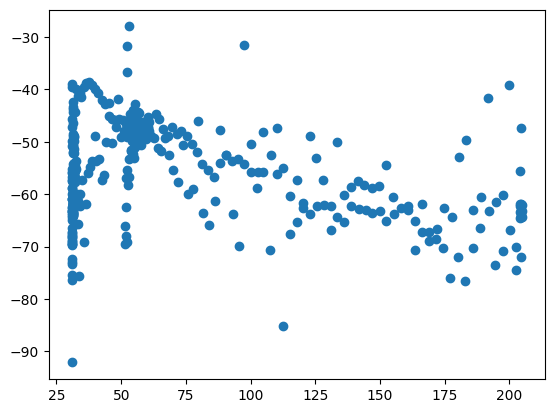

In [69]:
x = df['Distance']
y = df['Power']

# sns.lineplot(x=df['Distance'], y=df['Power'])

plt.scatter(x,y)
# plt.xlabel('diatance')
# plt.ylabel('power')




In [70]:
ymean = np.mean(y)
print('mean;', ymean)
ystd = np.std(y)
print('std;', ystd)

mean; -55.84289325842697
std; 9.445446843175707


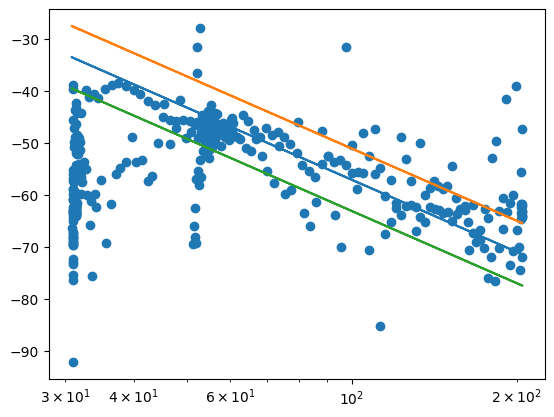

In [71]:
x = df['Distance']
y = df['Power']

plt.xscale("log")
plt.scatter(x,y)




offset = 35
fsloss = -20*np.log(x) + offset
fsloss6p = -20*np.log(x) + offset + 6
fsloss6m = -20*np.log(x) + offset - 6

plt.xscale("log")
plt.plot(x, fsloss)
plt.plot(x, fsloss6p)
plt.plot(x, fsloss6m)



In [72]:
# to count the number of out-of-range-data;

numrows = len(df['Power'])
# print(numrows)

rowsize = df.shape[0]
# print(rowsize)




# initial variable for counting;
num_uprange = 0
num_unrange = 0

for i in range(rowsize):
  pwr = df.loc[i, 'Power']
  print(pwr)

  if pwr > fsloss6p[i]:
    num_uprange += 1

    print('located upper range,', num_uprange)

  elif pwr < fsloss6m[i]:
    num_unrange += 1
    print('located lower range', num_unrange)


# to calculate total number of outofrange;
outofrange = num_unrange + num_uprange
print(outofrange)

rate_outofrange = outofrange/rowsize
rate_inrange = 1 - rate_outofrange
print(rate_inrange)

-64.11
located lower range 1
-62.82
located lower range 2
-42.43
located lower range 3
-63.53
located lower range 4
-62.53
located lower range 5
-63.88
located lower range 6
-63.91
located lower range 7
-63.78
located lower range 8
-62.02
located lower range 9
-63.0
located lower range 10
-62.06
located lower range 11
-62.56
located lower range 12
-63.58
located lower range 13
-63.59
located lower range 14
-62.24
located lower range 15
-61.82
located lower range 16
-63.31
located lower range 17
-62.21
located lower range 18
-61.8
located lower range 19
-61.44
located lower range 20
-61.83
located lower range 21
-63.08
located lower range 22
-61.89
located lower range 23
-61.63
located lower range 24
-61.74
located lower range 25
-62.35
located lower range 26
-61.88
located lower range 27
-46.37
located lower range 28
-59.63
located lower range 29
-54.21
located lower range 30
-50.66
located lower range 31
-51.89
located lower range 32
-43.66
located lower range 33
-50.86
located lower 

to calculate median values;

In [73]:
numRows = len(df['Distance'])
print('number of rows;', numRows)

rowSize = df.shape[0]
print('row size;', rowSize)




# to set first location to reference position;
r0 = df.iloc[0]['Distance']
# print('r0;', r0)



for i in range(numRows):
  r = df.iloc[i]['Distance']
  # print('r;', r)


  # to calculate cell regions;
  # numCellregion = (r - r0)/5
  # print('number of cell region;', numCellregion)



  # to calculate quotient;
  numCellRegion = (r - r0)//5
  # print('number of cell region;', numCellRegion)

  # print('ith;', i)
  df.loc[i, 'CellRegion'] = numCellRegion


df.to_csv('dataframe.csv')
df

number of rows; 356
row size; 356


,Date,Lat,Lon,Alt,S Lat,S Lon,S Alt,Distance,Power,cal-offset,offset,772,Unnamed: 12,850,2400,5100,Building Count,Unnamed: 17,cal,CellRegion
0,2023-05-31 14:36,36.351290,127.349101,48.0,36.351051,127.349287,43,31.34103,-64.11,-22.548770,-47.11430,-34.11430,NaN,-34.95033,-43.96618,-50.51336,0,NaN,NaN,0.0
1,2023-05-31 14:36,36.351290,127.349101,48.0,36.351051,127.349287,43,31.34103,-62.82,-22.548770,-47.11430,-34.11430,NaN,-34.95033,-43.96618,-50.51336,0,NaN,NaN,0.0
2,2023-05-31 14:36,36.351290,127.349101,48.0,36.351051,127.349287,43,31.34103,-42.43,-22.548770,-47.11430,-34.11430,NaN,-34.95033,-43.96618,-50.51336,0,NaN,NaN,0.0
3,2023-05-31 14:36,36.351290,127.349101,48.0,36.351051,127.349287,43,31.34103,-63.53,-22.548770,-47.11430,-34.11430,NaN,-34.95033,-43.96618,-50.51336,0,NaN,NaN,0.0
4,2023-05-31 14:36,36.351290,127.349101,48.0,36.351051,127.349287,43,31.34103,-62.53,-22.548770,-47.11430,-34.11430,NaN,-34.95033,-43.96618,-50.51336,0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
351,2023-05-31 14:41,36.351296,127.349121,47.9,36.351051,127.349287,43,30.99958,-60.83,-19.996351,-47.01915,-34.01915,NaN,-34.85518,-43.87103,-50.41821,0,NaN,NaN,-1.0
352,2023-05-31 14:41,36.351296,127.349121,47.9,36.351051,127.349287,43,30.99958,-55.16,-19.996351,-47.01915,-34.01915,NaN,-34.85518,-43.87103,-50.41821,0,NaN,NaN,-1.0
353,2023-05-31 14:41,36.351296,127.349121,47.9,36.351051,127.349287,43,30.99958,-63.57,-19.996351,-47.01915,-34.01915,NaN,-34.85518,-43.87103,-50.41821,0,NaN,NaN,-1.0
354,2023-05-31 14:41,36.351296,127.349121,47.9,36.351051,127.349287,43,30.99958,-60.86,-19.996351,-47.01915,-34.01915,NaN,-34.85518,-43.87103,-50.41821,0,NaN,NaN,-1.0


<Axes: xlabel='CellRegion'>

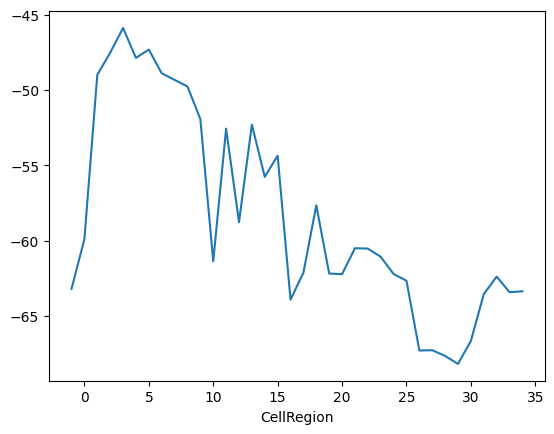

In [74]:
median = df.groupby('CellRegion')['Power'].median()
# print(median)
median.to_csv('median.csv')



df.groupby('CellRegion')['Power'].median().plot(kind='line')
# df.groupby('CellRegion')['Power'].mean().plot(kind='box')

<Axes: xlabel='CellRegion'>

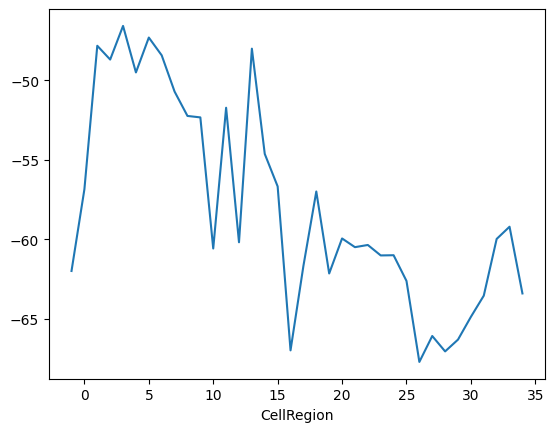

In [75]:
df.groupby('CellRegion')['Power'].mean().plot(kind='line')

In [76]:
dfm = pd.read_csv('median.csv')
# dfm = pd.DataFrame(median)

dfm

# dfm['CellRegion']
# dfm['Power']


,CellRegion,Power
0,-1.0,-63.190
1,0.0,-59.890
2,1.0,-48.990
3,2.0,-47.515
4,3.0,-45.870
5,4.0,-47.860
6,5.0,-47.305
7,6.0,-48.880
8,7.0,-49.320
9,8.0,-49.755


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CellRegion  36 non-null     float64
 1   Power       36 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


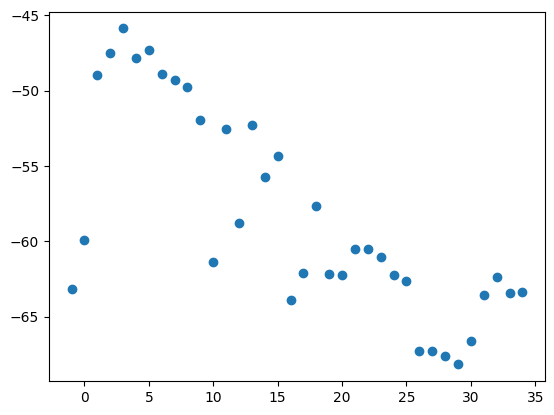

In [77]:
dfm.info()
dfm.size
plt.scatter(dfm['CellRegion'], dfm['Power'])

In [78]:
# plt.scatter(dfm['CellRegion']+5, dfm['Power'])

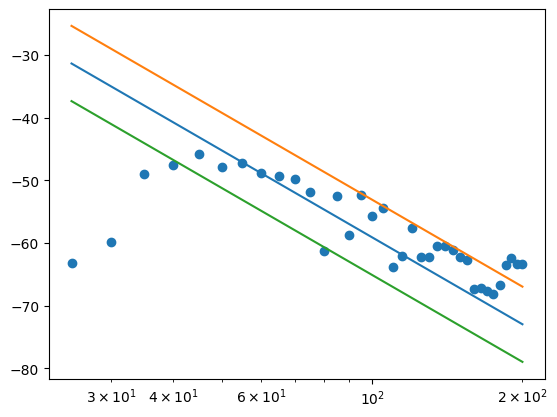

In [79]:
xlog = 30 + dfm['CellRegion']*5





# to set offset;
offset = 33
fsloss = -20*np.log(xlog) + offset
fsloss6p = -20*np.log(xlog) + offset + 6
fsloss6m = -20*np.log(xlog) + offset - 6


plt.xscale("log")
plt.plot(xlog, fsloss)
plt.plot(xlog, fsloss6p)
plt.plot(xlog, fsloss6m)

plt.xscale("log")
plt.scatter(xlog, dfm['Power'])




In [80]:

# to count the number of out-of-range-data;

numrows = len(dfm['Power'])
# print(numrows)

rowsize = dfm.shape[0]
# print(rowsize)




# initial variable for counting;
num_upperrange = 0
num_underrange = 0

for i in range(numrows):
  pwr = dfm.loc[i, 'Power']
  print(pwr)

  if pwr > fsloss6p[i]:
    num_upperrange += 1

    print('located upper range,', num_upperrange)

  elif pwr < fsloss6m[i]:
    num_underrange += 1
    print('located lower range', num_underrange)


# to calculate total number of outofrange;
outofrange = num_underrange + num_upperrange
print(outofrange)

rate_outofrange = outofrange/numrows
rate_inrange = 1 - rate_outofrange
print(rate_inrange)


-63.19
located lower range 1
-59.89
located lower range 2
-48.99
located lower range 3
-47.515
located lower range 4
-45.87
-47.86
-47.305
-48.88
-49.32
-49.755
-51.92
-61.36
located lower range 5
-52.555
-58.760000000000005
-52.290000000000006
-55.755
-54.35
-63.905
-62.115
-57.645
-62.17
-62.215
-60.49
-60.515
-61.06
-62.205
-62.65
-67.28
-67.26
-67.64
-68.17
-66.64
-63.54
located upper range, 1
-62.375
located upper range, 2
-63.41
located upper range, 3
-63.35
located upper range, 4
9
0.75


#to draw lines of linear regression

In [81]:
# X = df[['Distance']]
# print('X;', X)

# y = df['Power']
# print('y;', y)

# plt.scatter(X, y)

X;      Distance
70   53.48461
71   54.90858
72   56.38226
73   56.42548
74   55.72733
..        ...
275  55.90122
276  54.65096
277  53.41005
278  52.18186
279  50.96547

[210 rows x 1 columns]
y; 70    -46.48
71    -45.19
72    -44.33
73    -45.99
74    -46.97
       ...  
275   -45.35
276   -47.04
277   -44.67
278   -46.09
279   -47.91
Name: Power, Length: 210, dtype: float64


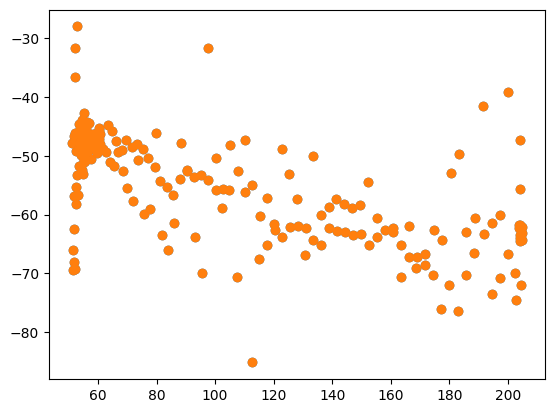

In [82]:
xdf = df[['Distance']].iloc[70:280]


ydf = df['Power'].iloc[70:280]
ydf

plt.scatter(xdf, ydf)


X = xdf
# X = df[['Distance']]
print('X;', X)

y = ydf
# y = df['Power']
print('y;', y)

plt.scatter(X, y)

In [83]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [84]:
r_square = model.score(X, y)
print('r2;', r_square)

r2; 0.4203507699593274


In [85]:
print('coefficient;', model.coef_)

print('intercept;', model.intercept_)

coefficient; [-0.11175002]
intercept; -43.51008352375315


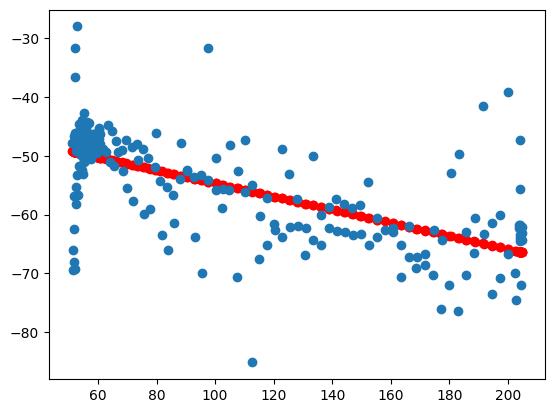

In [86]:
y_pred = model.predict(X)

plt.scatter(X, y_pred, color='r')
plt.scatter(X, y)

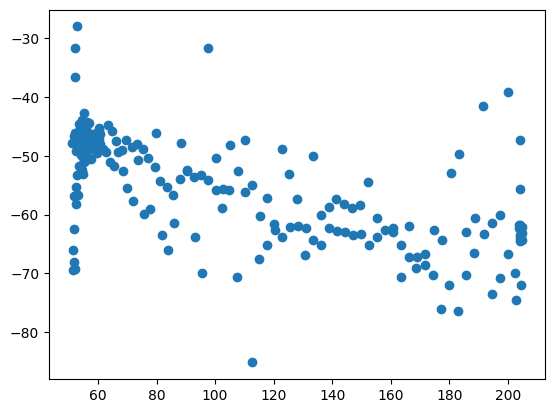

In [87]:
# xdf = df[['Distance']]
xdf = df[['Distance']].iloc[70:280]

xdf
ydf = df['Power'].iloc[70:280]
ydf

plt.scatter(xdf, ydf)